# Decoding Arctic Monkeys

I have been watching album reviews recently and one reviewer mentioned that the length of tracks on Arctic Monkeys third record called Humbug is pretty generous (e.g. 5:44 in the case of The Jeweller's Hands or 4:44 in Dance Little Liar).

Considering the fact that a typical "radio hit" is usually no more than 3 and a half minutes, this got me thinking if there is some pattern to the length of tracks by Arctic Monkeys as I remember that the songs featured of their debut album Whatever People Say I Am, That's What I'm Not were much shorter. And by the way, I'm a big Arctic Monkeys fan...


## Research question
In the end, I came up with the following research question **"Did the average length of their songs changed with newer Arctic Monkeys albums?"**

## 1. Get the data
* Get album data from Deezer's API – [search query](https://developers.deezer.com/api/explorer)
* Get avg track duration per album in minutes from Deezer's API – [Album/Tracks](https://developers.deezer.com/api/album/tracks)
* Using median as the number of songs on the different albums varies
* Getting 1st six entries only - they have six albums
* No album release date, needed added & sorted by release date manually

In [107]:
import requests
from statistics import median, mean

import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

In [119]:
def get_all_albums(artist):
    response = requests.get(f'https://api.deezer.com/search/album?q={artist}')
    response = response.json() 
    albums = {item['id']: item['title'] for item in response['data'][0:6]}
    
    return albums

In [120]:
albums = get_all_albums('arcticmonkeys')

In [121]:
print(albums)

{6899610: 'AM', 401346: 'Favourite Worst Nightmare', 401340: "Whatever People Say I Am, That's What I'm Not", 401361: 'Humbug', 63203772: 'Tranquility Base Hotel & Casino', 1166556: 'Suck It and See'}


## 2. Analyse the data

In [231]:
def get_song_dur_by_album(album_ids):
    
    song_durations = dict()
    
    for album_id, album_title in album_ids.items():
        response = requests.get(f'https://api.deezer.com/album/{album_id}/tracks')
        response = response.json()
        tracks_per_album = response['data']
        
        # Get song duration in a list
        dur = [track['duration'] for track in tracks_per_album]
        
        # Add entry (average duration of all tracks) per album into dictionary
        song_durations[album_title] = round(median(dur) / 60, 1)
        
    
    return song_durations

In [232]:
track_len = get_song_dur_by_album(albums)

In [233]:
track_len_sorted_by_release = {"Whatever People Say I Am, That's What I'm Not": "2.9", 'Favourite Worst Nightmare': 3.1, 'Humbug': 3.7, 'Suck It and See': 3.3, 'AM': 3.4, 'Tranquility Base Hotel & Casino': 3.5}

In [234]:
print(track_len_sorted_by_release)

{"Whatever People Say I Am, That's What I'm Not": '2.9', 'Favourite Worst Nightmare': 3.1, 'Humbug': 3.7, 'Suck It and See': 3.3, 'AM': 3.4, 'Tranquility Base Hotel & Casino': 3.5}


## 3. Visualise the data

In [235]:
# Creating Pandas dataframe (order by release date)

title = list(track_len_sorted_by_release.keys())
dur = list(track_len_sorted_by_release.values())
df = pd.DataFrame({'Album title': title,
                   'Track length in minutes': dur,
                   'Release': [2006, 2007, 2009, 2013, 2011, 2018]}) 

df.set_index('Release')

,Album title,Track length in minutes
Release,,
2006,"Whatever People Say I Am, That's What I'm Not",2.9
2007,Favourite Worst Nightmare,3.1
2009,Humbug,3.7
2013,Suck It and See,3.3
2011,AM,3.4
2018,Tranquility Base Hotel & Casino,3.5


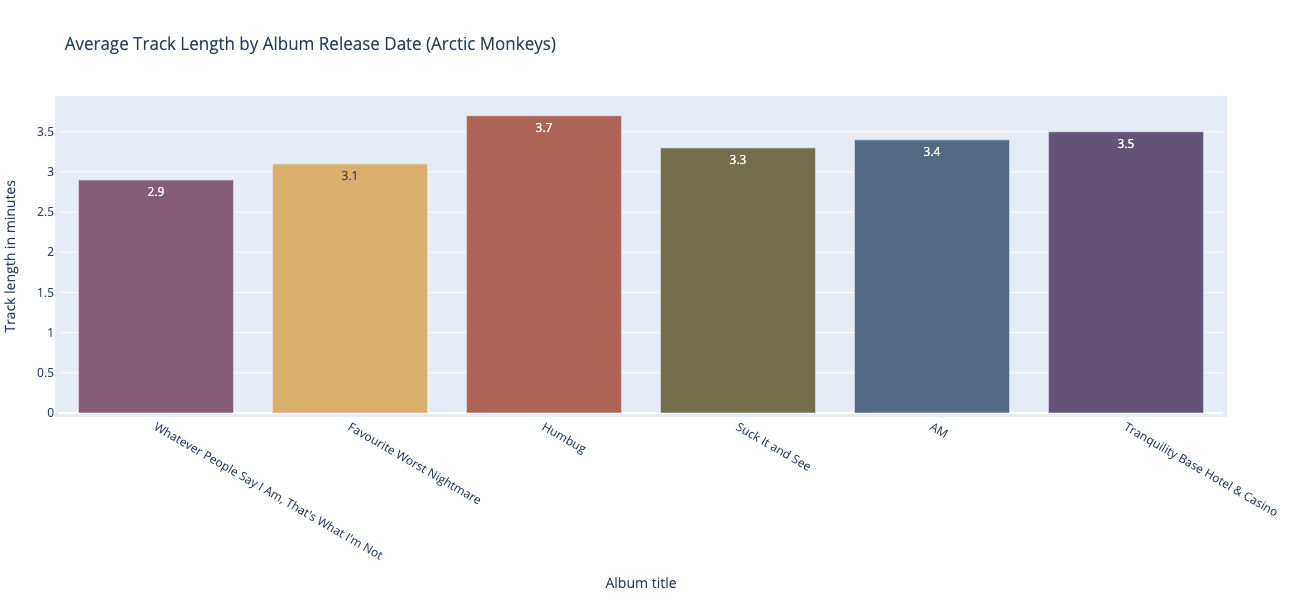

In [236]:
# Figure with Plotly express

fig = px.bar(df, 
             x='Album title', 
             y='Track length in minutes', 
             title="Average Track Length by Album Release Date (Arctic Monkeys)", 
             text='Track length in minutes',
             color='Track length in minutes',
             color_discrete_sequence=px.colors.qualitative.Antique,
             width=750,
             height=600,
            )

fig.update_layout(showlegend=False)

fig.update_layout(
    autosize=False,
    margin=dict(
        l=50,
        r=50,
        b=100,
        t=100,
        pad=4
    )
)

fig.show()